# 120 years of Olympic history

## Discription

###  Context

The Olympic Games (French: Jeux olympiques) is an important international event featuring summer and winter sports, which are held every four years.This dataset consist of atheletes and results of 120 years of olympic. It's a historical dataset on the modern Olympic Games, including all the Games from Athens 1896 to Rio 2016. This dataset has been picked from: https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results.

###  Content

This dataset contains 271116 rows and 13 columns. Each row corresponds to an individual athlete competing in an individual Olympic event(athlete-events). The columns are:

1. ID - Unique number for each athlete <br>
2. Name - Athlete's name <br>
3. Sex - Male(M) or Female(F) <br>
4. Age - Integer <br>
5. Height - In centimeters <br>
6. Weight - In kilograms <br>
7. Team - Team name <br>
8. Year - Integer <br>
9. Season - Summer or Winter <br>
10. City - Host city <br>
11. Sport - Sport <br>
12. Event - Event <br>
13. Medal - Gold, Silver, Bronze, or NA


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.__version__

'0.24.2'

In [2]:
df = pd.read_csv('athlete_events.csv', index_col='ID')
df

,Name,Sex,Age,Height,Weight,Team,Year,Season,City,Sport,Event,Medal
ID,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.0,80.0,China,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
2,A Lamusi,M,23.0,170.0,60.0,China,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
df.shape

(271116, 12)

In [4]:
df.loc[5]

,Name,Sex,Age,Height,Weight,Team,Year,Season,City,Sport,Event,Medal
ID,,,,,,,,,,,,
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 1 to 135571
Data columns (total 12 columns):
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(1), object(8)
memory usage: 36.9+ MB


In [6]:
# Average
print(df['Age'].mean())
print(df['Height'].mean())
print(df['Weight'].mean()) 

25.556898357297374
175.33896987366376
70.70239290053351


In [7]:
# Minimum
print(df['Age'].min())
print(df['Height'].min())
print(df['Weight'].min())

10.0
127.0
25.0


In [8]:
# Maximum
print(df['Age'].max())
print(df['Height'].max())
print(df['Weight'].max())

97.0
226.0
214.0


In [9]:
# Number of missing values
print(df['Name'].isnull().sum())
print(df['Sex'].isnull().sum())
print(df['Age'].isnull().sum())
print(df['Height'].isnull().sum())
print(df['Weight'].isnull().sum())
print(df['Team'].isnull().sum())
print(df['Year'].isnull().sum())
print(df['Season'].isnull().sum())
print(df['City'].isnull().sum())
print(df['Sport'].isnull().sum())
print(df['Event'].isnull().sum())
print(df['Medal'].isnull().sum())

0
0
9474
60171
62875
0
0
0
0
0
0
231333


In [10]:
# Unique values
print(pd.unique(df['Name']))
print(pd.unique(df['Sex']))
print(pd.unique(df['Age']))
print(pd.unique(df['Height']))
print(pd.unique(df['Weight']))
print(pd.unique(df['Team']))
print(pd.unique(df['Year']))
print(pd.unique(df['Season']))
print(pd.unique(df['City']))
print(pd.unique(df['Sport']))
print(pd.unique(df['Event']))
print(pd.unique(df['Medal']))

['A Dijiang' 'A Lamusi' 'Gunnar Nielsen Aaby' ... 'Andrzej ya' 'Piotr ya'
 'Tomasz Ireneusz ya']
['M' 'F']
[24. 23. 34. 21. 25. 27. 31. 33. 18. 26. 22. 30. 32. 28. 54. 20. 17. 43.
 47. 29. 41. 45. 49. 53. 57. nan 19. 38. 35. 16. 37. 15. 42. 46. 40. 36.
 14. 39. 48. 52. 44. 55. 50. 71. 63. 51. 58. 13. 60. 75. 65. 56. 64. 68.
 84. 12. 72. 59. 61. 70. 74. 62. 67. 69. 73. 66. 11. 76. 88. 96. 80. 10.
 81. 77. 97.]
[180. 170.  nan 185. 188. 183. 168. 186. 182. 172. 159. 171. 184. 175.
 189. 176. 163. 187. 169. 174. 190. 194. 177. 167. 164. 198. 165. 156.
 179. 178. 166. 181. 155. 160. 173. 192. 195. 191. 203. 158. 154. 153.
 152. 193. 162. 197. 157. 207. 147. 150. 202. 161. 210. 205. 200. 148.
 208. 140. 213. 204. 151. 196. 146. 201. 132. 149. 199. 211. 215. 139.
 206. 135. 142. 217. 209. 145. 221. 144. 214. 143. 218. 127. 223. 216.
 141. 212. 131. 136. 137. 138. 220. 130. 219. 133. 128. 226.]
[ 80.          60.                  nan  82.          75.
  72.          96.          76.5         

[nan 'Gold' 'Bronze' 'Silver']


In [11]:
df["Age"]=df["Age"].fillna(df["Age"].mean())
df["Height"]=df["Height"].fillna(df["Height"].mean())
df["Weight"]=df["Weight"].fillna(df["Weight"].mean())
df.head()

,Name,Sex,Age,Height,Weight,Team,Year,Season,City,Sport,Event,Medal
ID,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.00000,80.000000,China,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
2,A Lamusi,M,23.0,170.00000,60.000000,China,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
3,Gunnar Nielsen Aaby,M,24.0,175.33897,70.702393,Denmark,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
4,Edgar Lindenau Aabye,M,34.0,175.33897,70.702393,Denmark/Sweden,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
5,Christine Jacoba Aaftink,F,21.0,185.00000,82.000000,Netherlands,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [12]:
df["Height"]=df["Height"].round(decimals=1)
df["Weight"]=df["Weight"].round(decimals=1)
df.head()

,Name,Sex,Age,Height,Weight,Team,Year,Season,City,Sport,Event,Medal
ID,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.0,80.0,China,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
2,A Lamusi,M,23.0,170.0,60.0,China,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
3,Gunnar Nielsen Aaby,M,24.0,175.3,70.7,Denmark,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
4,Edgar Lindenau Aabye,M,34.0,175.3,70.7,Denmark/Sweden,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [13]:
age_over_40 = df[df['Age']>40]
print(age_over_40)

                                                     Name Sex   Age  Height  \
ID                                                                            
19                                  Win Valdemar Aaltonen   M  54.0   175.3   
28                                       Jan-Erik Aarberg   M  43.0   170.0   
28                                       Jan-Erik Aarberg   M  47.0   170.0   
45                                            Hakon Aasns   M  41.0   175.3   
46                                             Hans Aasns   M  45.0   194.0   
46                                             Hans Aasns   M  49.0   194.0   
46                                             Hans Aasns   M  53.0   194.0   
46                                             Hans Aasns   M  57.0   194.0   
140                             William "Bill" Abbott Jr.   M  42.0   172.0   
140                             William "Bill" Abbott Jr.   M  46.0   172.0   
147                                         Joanne A

In [14]:
age_over_40 = df['Age']>40
df[age_over_40]

,Name,Sex,Age,Height,Weight,Team,Year,Season,City,Sport,Event,Medal
ID,,,,,,,,,,,,
19,Win Valdemar Aaltonen,M,54.0,175.3,70.7,Finland,1948,Summer,London,Art Competitions,"Art Competitions Mixed Sculpturing, Unknown Event",NaN
28,Jan-Erik Aarberg,M,43.0,170.0,77.0,Norway,1968,Summer,Mexico City,Sailing,Sailing Mixed Three Person Keelboat,NaN
28,Jan-Erik Aarberg,M,47.0,170.0,77.0,Norway,1972,Summer,Munich,Sailing,Sailing Mixed Three Person Keelboat,NaN
45,Hakon Aasns,M,41.0,175.3,70.7,Norway,1936,Summer,Berlin,Shooting,"Shooting Men's Small-Bore Rifle, Prone, 50 metres",NaN
46,Hans Aasns,M,45.0,194.0,93.0,Norway,1948,Summer,London,Shooting,"Shooting Men's Rapid-Fire Pistol, 25 metres",NaN
46,Hans Aasns,M,49.0,194.0,93.0,Norway,1952,Summer,Helsinki,Shooting,Shooting Men's Trap,NaN
46,Hans Aasns,M,53.0,194.0,93.0,Norway,1956,Summer,Melbourne,Shooting,Shooting Men's Trap,NaN
46,Hans Aasns,M,57.0,194.0,93.0,Norway,1960,Summer,Roma,Shooting,Shooting Men's Trap,NaN
140,"William ""Bill"" Abbott Jr.",M,42.0,172.0,80.0,Canada,1996,Summer,Atlanta,Sailing,Sailing Mixed Three Person Keelboat,NaN


In [15]:
df.loc[0:271116,['Name','Medal']]

,Name,Medal
ID,,
1,A Dijiang,NaN
2,A Lamusi,NaN
3,Gunnar Nielsen Aaby,NaN
4,Edgar Lindenau Aabye,Gold
5,Christine Jacoba Aaftink,NaN
5,Christine Jacoba Aaftink,NaN
5,Christine Jacoba Aaftink,NaN
5,Christine Jacoba Aaftink,NaN
5,Christine Jacoba Aaftink,NaN


In [16]:
df.sort_values(by='Year', inplace=True)
df

,Name,Sex,Age,Height,Weight,Team,Year,Season,City,Sport,Event,Medal
ID,,,,,,,,,,,,
107607,Fritz Richard Gustav Schuft,M,19.000000,175.3,70.7,Germany,1896,Summer,Athina,Gymnastics,Gymnastics Men's Pommelled Horse,NaN
122526,Pierre Alexandre Tuffri,M,19.000000,175.3,70.7,France,1896,Summer,Athina,Athletics,Athletics Men's Triple Jump,Silver
122526,Pierre Alexandre Tuffri,M,19.000000,175.3,70.7,France,1896,Summer,Athina,Athletics,Athletics Men's Long Jump,NaN
12563,Conrad Helmut Fritz Bcker,M,25.000000,175.3,70.7,Germany,1896,Summer,Athina,Gymnastics,Gymnastics Men's Horse Vault,NaN
12563,Conrad Helmut Fritz Bcker,M,25.000000,175.3,70.7,Germany,1896,Summer,Athina,Gymnastics,Gymnastics Men's Parallel Bars,NaN
12563,Conrad Helmut Fritz Bcker,M,25.000000,175.3,70.7,Germany,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Parallel Bars, Teams",Gold
12563,Conrad Helmut Fritz Bcker,M,25.000000,175.3,70.7,Germany,1896,Summer,Athina,Gymnastics,Gymnastics Men's Horizontal Bar,NaN
12563,Conrad Helmut Fritz Bcker,M,25.000000,175.3,70.7,Germany,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Horizontal Bar, Teams",Gold
12563,Conrad Helmut Fritz Bcker,M,25.000000,175.3,70.7,Germany,1896,Summer,Athina,Gymnastics,Gymnastics Men's Rings,NaN


In [17]:
df.Medal.value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

In [18]:
filt = (df['Team'] == 'India') & (df['Medal'] == 'Gold')
df.loc[filt, ['Name','Event','Medal']]

,Name,Event,Medal
ID,,,
109615,Pasang Sherpa,Alpinism Mixed Alpinism,Gold
109616,Pembra Sherpa,Alpinism Mixed Alpinism,Gold
109617,Sange Sherpa,Alpinism Mixed Alpinism,Gold
109618,Temba Sherpa,Alpinism Mixed Alpinism,Gold
109611,Antarge Sherpa,Alpinism Mixed Alpinism,Gold
109613,Lhakpa Sherpa,Alpinism Mixed Alpinism,Gold
109614,Narbu Sherpa,Alpinism Mixed Alpinism,Gold
41710,"William James ""Willie"" Goodsir-Cullen",Hockey Men's Hockey,Gold
59150,"Feroz-ud-Din ""Feroze"" Khan",Hockey Men's Hockey,Gold


In [19]:
type(filt)

pandas.core.series.Series

In [20]:
df.loc[:,['Name','Sex','Age','Team','Year','Event','Medal']].nlargest(50,'Age')

,Name,Sex,Age,Team,Year,Event,Medal
ID,,,,,,,
128719,John Quincy Adams Ward,M,97.0,United States,1928,"Art Competitions Mixed Sculpturing, Statues",NaN
49663,Winslow Homer,M,96.0,United States,1932,"Art Competitions Mixed Painting, Unknown Event",NaN
31173,Thomas Cowperthwait Eakins,M,88.0,United States,1932,"Art Competitions Mixed Painting, Unknown Event",NaN
31173,Thomas Cowperthwait Eakins,M,88.0,United States,1932,"Art Competitions Mixed Painting, Unknown Event",NaN
31173,Thomas Cowperthwait Eakins,M,88.0,United States,1932,"Art Competitions Mixed Painting, Unknown Event",NaN
5146,George Denholm Armour,M,84.0,Great Britain,1948,"Art Competitions Mixed Painting, Unknown Event",NaN
118789,Louis Tauzin,M,81.0,France,1924,Art Competitions Mixed Sculpturing,NaN
77710,Robert Tait McKenzie,M,81.0,Canada,1948,"Art Competitions Mixed Sculpturing, Unknown Event",NaN
69729,Max Liebermann,M,80.0,Germany,1928,"Art Competitions Mixed Painting, Graphic Arts",NaN


In [21]:
df['Team'].value_counts().head(50)

United States     17847
France            11988
Great Britain     11404
Italy             10260
Germany            9326
Canada             9279
Japan              8289
Sweden             8052
Australia          7513
Hungary            6547
Poland             6143
Switzerland        5844
Netherlands        5718
Soviet Union       5535
Finland            5379
Spain              5224
China              4975
Russia             4922
Austria            4866
Norway             4708
Czechoslovakia     4352
South Korea        4344
Romania            4303
Brazil             3772
Belgium            3687
Bulgaria           3518
Denmark            3424
Argentina          3199
West Germany       3199
Greece             2976
Mexico             2857
Yugoslavia         2558
East Germany       2543
Ukraine            2511
Cuba               2464
New Zealand        2328
Czech Republic     1802
Belarus            1783
South Africa       1690
Egypt              1622
Portugal           1472
Kazakhstan      

In [22]:
filt = df['Team'] == 'India'
df.loc[filt]['Medal'].value_counts()

Gold      138
Bronze     40
Silver     19
Name: Medal, dtype: int64

In [23]:
team_grp=df.groupby(['Team'])

In [24]:
team_grp['Sex'].value_counts().loc['India']

Sex
M    1159
F     241
Name: Sex, dtype: int64

In [25]:
filt = (df['Sex'].apply(lambda x: x == 'F' )) & (df['Medal'].apply(lambda x: x == x )) & (df['Team'].apply(lambda x: x == 'India' )) 
df.loc[filt,['Name','Year','Event','Medal']]

,Name,Year,Event,Medal
ID,,,,
74119,Karnam Malleswari,2000,Weightlifting Women's Light-Heavyweight,Bronze
85112,Saina Nehwal,2012,Badminton Women's Singles,Bronze
62303,Mangte Chungneijang Mary Kom,2012,Boxing Women's Flyweight,Bronze
110974,"Pusarla Venkata ""P. V."" Sindhu",2016,Badminton Women's Singles,Silver
74069,Sakshi Malik,2016,"Wrestling Women's Lightweight, Freestyle",Bronze


In [26]:
team_players = df['Team'].value_counts()
team_F = team_grp['Sex'].apply(lambda x: (x == 'F').sum())
perc_df= pd.concat([team_players,team_F], axis = 'columns', sort=False)
perc_df.rename(columns={'Team': 'Total_players', 'Sex': 'Total_females'}, inplace=True)
perc_df['Percentage']= (perc_df['Total_females']/perc_df['Total_players'])*100
perc_df

,Total_players,Total_females,Percentage
United States,17847,5368,30.077884
France,11988,2743,22.881215
Great Britain,11404,3188,27.955103
Italy,10260,2504,24.405458
Germany,9326,2911,31.213811
Canada,9279,3473,37.428602
Japan,8289,2727,32.899023
Sweden,8052,1970,24.465971
Australia,7513,2697,35.897777
Hungary,6547,1734,26.485413


In [27]:
perc_df.loc['India']

Total_players    1400.000000
Total_females     241.000000
Percentage         17.214286
Name: India, dtype: float64

In [28]:
filt1 = ((df['Sex'].apply(lambda x: x == 'F' )) & (df['Year'].apply(lambda x: x <= 2000 ))).sum()
filt2 = ((df['Sex'].apply(lambda x: x == 'F' )) & (df['Year'].apply(lambda x: x > 2000 ))).sum()
filt3 = ((df['Year'].apply(lambda x: x <= 2000 ))).sum()
filt4 = ((df['Year'].apply(lambda x: x > 2000 ))).sum()
print('Female players perentage in 20th century',(filt1/filt3)*100)
print('Female players perentage in 21th century',(filt2/filt4)*100)

Female players perentage in 20th century 21.99179683391844
Female players perentage in 21th century 42.8475439898092


In [29]:
team_df1=df[df['Year'].apply(lambda x: x <= 2000 )]
team_players1=team_df1['Team'].value_counts()
team_players1.sort_index(inplace=True)
team_df2=df[df['Year'].apply(lambda x: x > 2000 )]
team_players2=team_df2['Team'].value_counts()
team_players2.sort_index(inplace=True)
team_fdf1 = df[(df['Sex'].apply(lambda x: x == 'F' )) & (df['Year'].apply(lambda x: x <= 2000 ))]
team_female1=team_fdf1['Team'].value_counts()
team_female1.sort_index(inplace=True)
team_fdf2 = df[(df['Sex'].apply(lambda x: x == 'F' )) & (df['Year'].apply(lambda x: x > 2000 ))]
team_female2=team_fdf2['Team'].value_counts()
team_female2.sort_index(inplace=True)
compare_df = pd.concat([team_players1,team_female1,team_players2,team_female2], axis='columns', sort=False)
compare_df.columns = ['Players_20thcentury', 'Female_20thcentury', 'Players_21thcentury','Female_21thcentury']
compare_df['Percentage_20th']=(compare_df['Female_20thcentury']/compare_df['Players_20thcentury'])*100
compare_df['Percentage_21th']=(compare_df['Female_21thcentury']/compare_df['Players_21thcentury'])*100
compare_df.sort_values(by='Percentage_21th', inplace = True)
compare_df

,Players_20thcentury,Female_20thcentury,Players_21thcentury,Female_21thcentury,Percentage_20th,Percentage_21th
Saudi Arabia,162.0,NaN,68.0,5.0,NaN,7.352941
Qatar,101.0,NaN,91.0,7.0,NaN,7.692308
Iraq,176.0,2.0,56.0,5.0,1.136364,8.928571
Honduras,110.0,31.0,79.0,8.0,28.181818,10.126582
Pakistan,484.0,2.0,78.0,9.0,0.413223,11.538462
Eritrea,3.0,1.0,40.0,5.0,33.333333,12.500000
Nauru,5.0,1.0,8.0,1.0,20.000000,12.500000
Iran,554.0,19.0,235.0,30.0,3.429603,12.765957
Kuwait,253.0,NaN,31.0,4.0,NaN,12.903226
United Arab Emirates,92.0,NaN,52.0,7.0,NaN,13.461538


In [30]:
compare_df.loc['United States']

Players_20thcentury    13813.000000
Female_20thcentury      3455.000000
Players_21thcentury     4034.000000
Female_21thcentury      1913.000000
Percentage_20th           25.012669
Percentage_21th           47.421914
Name: United States, dtype: float64

In [31]:
compare_df.loc['India']

Players_20thcentury    1020.00000
Female_20thcentury       89.00000
Players_21thcentury     380.00000
Female_21thcentury      152.00000
Percentage_20th           8.72549
Percentage_21th          40.00000
Name: India, dtype: float64

In [32]:
filt1 = ((df['Sex'].apply(lambda x: x == 'F' )) & (df['Year'].apply(lambda x: (x < 2014) & (x > 2000))) & (df['Team'].apply(lambda x: x == 'India' ))).sum()
filt2 = ((df['Sex'].apply(lambda x: x == 'F' )) & (df['Year'].apply(lambda x: x >= 2014 )) & (df['Team'].apply(lambda x: x == 'India' ))).sum()
filt3 = ((df['Year'].apply(lambda x: (x < 2014) & (x > 2000) )) & (df['Team'].apply(lambda x: x == 'India' ))).sum()
filt4 = ((df['Year'].apply(lambda x: x >= 2014 )) & (df['Team'].apply(lambda x: x == 'India' ))).sum()
print('Female players perentage between 2000-2014:',(filt1/filt3)*100)
print('Female players perentage after 2014 (in 2016):',(filt2/filt4)*100)

Female players perentage between 2000-2014: 36.29032258064516
Female players perentage after 2014 (in 2016): 46.96969696969697


In [33]:
df["Medal"]=df["Medal"].fillna("Participant did not win")
df

,Name,Sex,Age,Height,Weight,Team,Year,Season,City,Sport,Event,Medal
ID,,,,,,,,,,,,
107607,Fritz Richard Gustav Schuft,M,19.000000,175.3,70.7,Germany,1896,Summer,Athina,Gymnastics,Gymnastics Men's Pommelled Horse,Participant did not win
122526,Pierre Alexandre Tuffri,M,19.000000,175.3,70.7,France,1896,Summer,Athina,Athletics,Athletics Men's Triple Jump,Silver
122526,Pierre Alexandre Tuffri,M,19.000000,175.3,70.7,France,1896,Summer,Athina,Athletics,Athletics Men's Long Jump,Participant did not win
12563,Conrad Helmut Fritz Bcker,M,25.000000,175.3,70.7,Germany,1896,Summer,Athina,Gymnastics,Gymnastics Men's Horse Vault,Participant did not win
12563,Conrad Helmut Fritz Bcker,M,25.000000,175.3,70.7,Germany,1896,Summer,Athina,Gymnastics,Gymnastics Men's Parallel Bars,Participant did not win
12563,Conrad Helmut Fritz Bcker,M,25.000000,175.3,70.7,Germany,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Parallel Bars, Teams",Gold
12563,Conrad Helmut Fritz Bcker,M,25.000000,175.3,70.7,Germany,1896,Summer,Athina,Gymnastics,Gymnastics Men's Horizontal Bar,Participant did not win
12563,Conrad Helmut Fritz Bcker,M,25.000000,175.3,70.7,Germany,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Horizontal Bar, Teams",Gold
12563,Conrad Helmut Fritz Bcker,M,25.000000,175.3,70.7,Germany,1896,Summer,Athina,Gymnastics,Gymnastics Men's Rings,Participant did not win


In [34]:
females=df[(df['Sex'] == 'F') & (df['Medal'] == 'Gold')]
males=df[(df['Sex'] == 'M') & (df['Medal'] == 'Gold')]
len_f=len(females)
len_m=len(males)

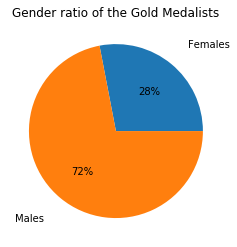

In [35]:
lbl=["Females","Males"]
y=[len_f,len_m]
plt.pie(y,labels=lbl,autopct='%1.0f%%',pctdistance=0.6,labeldistance=1.3)
plt.title("Gender ratio of the Gold Medalists")
plt.show()

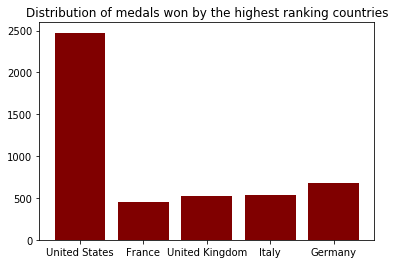

In [36]:
usa=len(df[(df['Team'] == 'United States') & (df['Medal'] == 'Gold')])
france=len(df[(df['Team'] == 'France') & (df['Medal'] == 'Gold')])
britain=len(df[(df['Team'] == 'Great Britain') & (df['Medal'] == 'Gold')])
italy=len(df[(df['Team'] == 'Italy') & (df['Medal'] == 'Gold')])
germany=len(df[(df['Team'] == 'Germany') & (df['Medal'] == 'Gold')])
lst=[usa,france,britain,italy,germany]
labels=["United States","France","United Kingdom","Italy","Germany"]
plt.bar(labels,lst, color='Maroon')
plt.title("Distribution of medals won by the highest ranking countries")
plt.show()

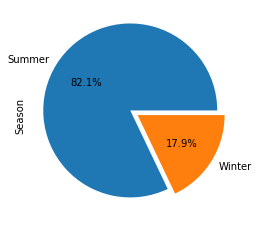

In [37]:
y = df['Season'].value_counts()
explode = (0.1, 0)
y.plot.pie(explode=explode,autopct='%1.1f%%')

Text(0, 0.5, 'Count')

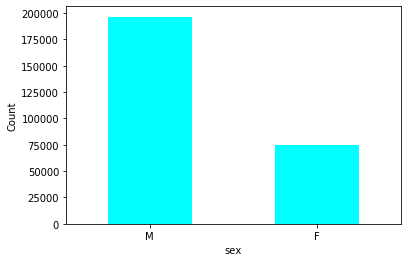

In [38]:
y1 = df['Sex'].value_counts()
y1.plot.bar(rot=0,color='cyan')
plt.xlabel("sex")
plt.ylabel("Count")

In [39]:
a = df.loc[(df['Team']=='Russia')]
a_data = a['Medal']
b = df.loc[(df['Team']=='India')]
b_data = b['Medal']
c = df.loc[(df['Team']=='United States')]
c_data = c['Medal']
d = df.loc[(df['Team']=='Japan')]
d_data = d['Medal']

Text(0.5, 1.0, 'Japan')

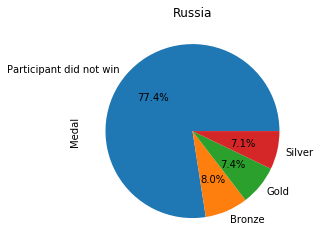

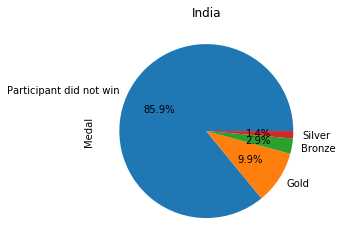

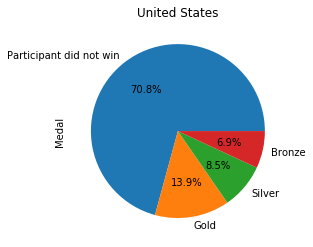

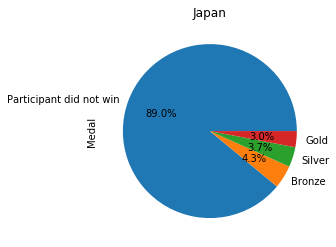

In [40]:
plt.figure(0)
pie1 = a_data.value_counts()
pie1.plot.pie(autopct='%1.1f%%')
plt.title("Russia")
plt.figure(1)
pie2 = b_data.value_counts()
pie2.plot.pie(autopct='%1.1f%%')
plt.title("India")
plt.figure(2)
pie3 = c_data.value_counts()
pie3.plot.pie(autopct='%1.1f%%')
plt.title("United States")
plt.figure(3)
pie4 = d_data.value_counts()
pie4.plot.pie(autopct='%1.1f%%')
plt.title("Japan")